In [1]:
import sys
sys.path.append("../src")
from agents.dqn import DDQNAgent
from be_env.base_env import BestExecutionEnv
from be_env.twap_env import TwapEnv
from be_env.train import TrainTabularAgent
import pickle

"""
    Agent Params
"""
epsilon = 1
min_epsilon = 0.05
gamma = 1
alpha = 0.0001
buffer_size = 50000
batch_size = 400
hidden_neurons = 256

"""
    Training Params
"""
nepisodes = 1500
n_log = 25
epsilon_decay = (epsilon - min_epsilon) / (nepisodes * 0.95)
learn_after = batch_size
"""
    Data
"""
with open("../data/rep_data.pickle", "rb") as f:
    df = pickle.load(f)
data = df["train"]


"""
    Process
"""
env = TwapEnv(data, 60)
agent = DDQNAgent(
    env, gamma=gamma, epsilon=epsilon, alpha=alpha,
    batch_size=batch_size, buffer_size=buffer_size,
    hidden_neurons=hidden_neurons, trainable=True
)

tba = TrainTabularAgent(
    agent=agent,
    env=env,
    buffer=buffer_size,
    nepisodes=nepisodes,
    n_log=n_log
)

tba.fill_buffer(strategy="twap")
tba.run_process(
    epsilon_decay=epsilon_decay,
    min_epsilon=min_epsilon,
    learn_after=learn_after
)


2022-04-07 20:45:47.001310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-07 20:45:47.001331: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-07 20:45:50.131288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-07 20:45:50.131317: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-07 20:45:50.131338: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-04-07 20:45:50.131479: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized wi

buffer exps: 0
buffer exps: 10000
buffer exps: 20000
buffer exps: 30000
buffer exps: 40000
Episode: 0, steps: 439.0, rew: -355.1, mse: 2.0, eps: 1.0
Episode: 25, steps: 473.44, rew: -238.09, mse: 9.0, eps: 0.98
Episode: 50, steps: 475.72, rew: -202.33, mse: 12.0, eps: 0.97
Episode: 75, steps: 458.12, rew: -210.96, mse: 14.0, eps: 0.95
Episode: 100, steps: 384.76, rew: -183.37, mse: 67.0, eps: 0.93
Episode: 125, steps: 306.12, rew: -188.46, mse: 47.0, eps: 0.92
Episode: 150, steps: 413.32, rew: -105.74, mse: 3.0, eps: 0.9
Episode: 175, steps: 443.76, rew: -100.92, mse: 65.0, eps: 0.88
Episode: 200, steps: 483.48, rew: -176.46, mse: 6.0, eps: 0.87
Episode: 225, steps: 488.08, rew: -275.74, mse: 5.0, eps: 0.85
Episode: 250, steps: 456.16, rew: -153.59, mse: 17.0, eps: 0.83
Episode: 275, steps: 400.72, rew: -128.25, mse: 34.0, eps: 0.82
Episode: 300, steps: 433.44, rew: -109.6, mse: 34.0, eps: 0.8
Episode: 325, steps: 440.4, rew: -75.94, mse: 37.0, eps: 0.78
Episode: 350, steps: 479.12, re

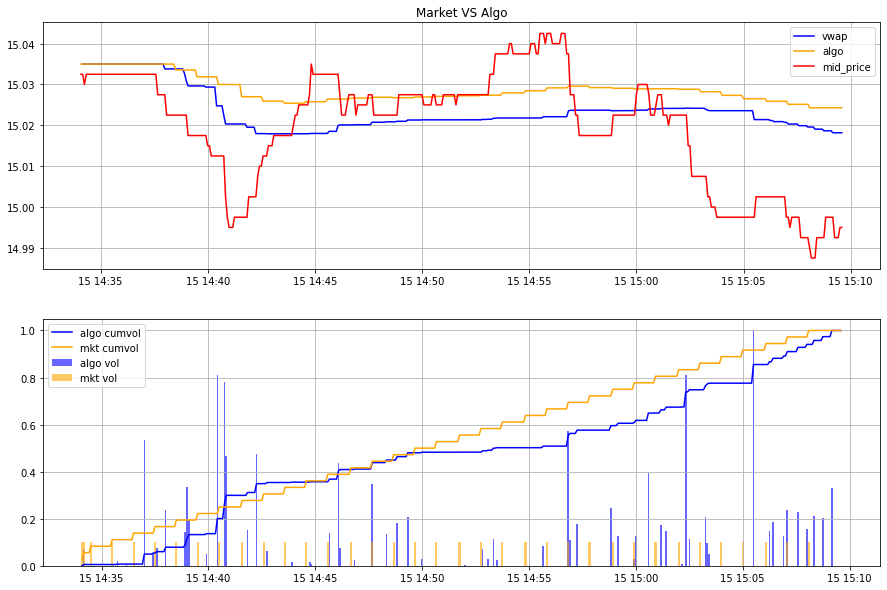

In [2]:
tba.plot_policy_results(df["test"])